In [1]:
#Cuong Phan
#Group 6
#SVM Example
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [2]:
x = [1,5,1.5,8,1,9]
y = [2,8,1.8,8,0.6,11]

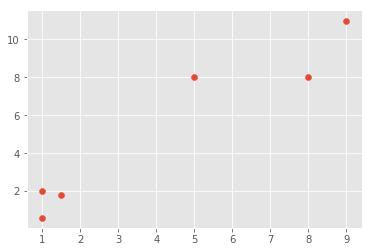

In [3]:
plt.scatter(x,y)
plt.show()

In [4]:
X = np.array([[1,2],[5,8],[1.5,1.8],[8,8],[1,0.6],[9,11]])

In [5]:
y = [0,1,0,1,0,1]

In [6]:
clf = svm.SVC(kernel='linear', C =1.0)

In [7]:
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [8]:
k = np.array([[0.58,0.7]])

In [9]:
k.reshape(-1,1)

array([[0.58],
       [0.7 ]])

In [10]:
print(clf.predict(k))

[0]


In [11]:
k = np.array([[10.58,10.7]])
k.reshape(-1,1)
print(clf.predict(k))

[1]


[0.1380943  0.24462418]


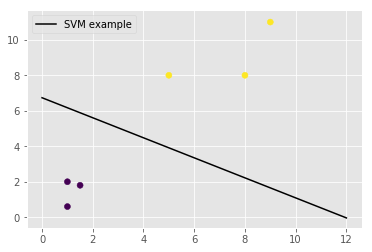

In [12]:
w = clf.coef_[0]
print(w)
a = -w[0]/w[1]
#max min normalization data between 0 and 12
xx = np.linspace(0,12)
yy = a*xx - clf.intercept_[0]/w[1]
h0 = plt.plot(xx,yy,'k-',label="SVM example")
plt.scatter(X[:,0],X[:,1],c=y)
plt.legend()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [14]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
y_pred = svclassifier.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [17]:
from scipy import stats
import seaborn as sns; sns.set()
from sklearn import datasets

In [18]:
#import iris data to model Svm classifier
iris_dataset = datasets.load_iris()

In [19]:
print ("Iris data set Description :: ", iris_dataset['DESCR'])

Iris data set Description ::  .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== 

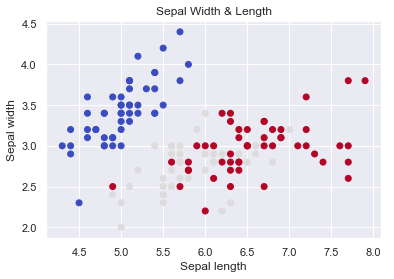

In [20]:
X = iris_dataset.data[:, :2] #The first two features
y = iris_dataset.target
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal Width & Length')
plt.show()

In [21]:
#Split data into training set(80%) and test set(20%)
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = 0.2,
                                                    random_state=0)

In [22]:
 
# SVC with linear kernel and C =100
svc_linear = SVC(kernel='linear', C=100)
svc_linear.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [23]:
#Predict using the test set
y_pred_svc_linear = svc_linear.predict(X_test)

In [24]:
#Function to calculate accuracy 
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ",confusion_matrix(y_test,y_pred))
    print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
    print("Report: ",classification_report(y_test,y_pred))
    df_confusion = pd.crosstab(y_test, y_pred,
                           rownames=['Actual'], 
                           colnames=['Predicted'], 
                           margins=True)
    plt.matshow(df_confusion, cmap="YlGn") 
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks,df_confusion.columns,
               rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)  

In [25]:
#Function to draw out ROC_curve:
def ROC_curve(y_test,y_pred):
    from sklearn.metrics import roc_curve,auc
    #GET ROC DATA
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
    roc_auc = auc(fpr, tpr)
    #GRAPH DATA
    plt.figure()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('SVM Classifier ROC')
    plt.plot(fpr, tpr, color='blue', lw=2, label='SVM ROC area = %0.2f)' % roc_auc)
    plt.legend(loc="lower right")
    plt.show()

Result using Linear SVM and C = 100: 
Confusion Matrix:  [[11  0  0]
 [ 0  8  5]
 [ 0  3  3]]
Accuracy:  73.33333333333333
Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.73      0.62      0.67        13
           2       0.38      0.50      0.43         6

   micro avg       0.73      0.73      0.73        30
   macro avg       0.70      0.71      0.70        30
weighted avg       0.76      0.73      0.74        30



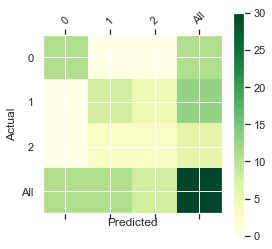

In [26]:
#Analyze result using confusion matrix
print("Result using Linear SVM and C = 100: ")
cal_accuracy(y_test,y_pred_svc_linear)

So the accuracy of prediction on the test set using Linear SVM is 73.33%

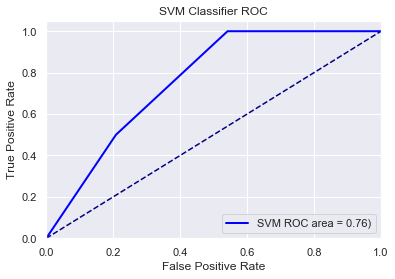

In [27]:
ROC_curve(y_test,y_pred_svc_linear)

The result of test set with linear SVM and C = 100 has ROC area = 0.76

In [28]:
# SVC with RBF kernel and C =1
svc_rbf = SVC(kernel='rbf', C=1)
svc_rbf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [29]:
#Predict using the test set
y_pred_svc_rbf = svc_rbf.predict(X_test)

Result using RBF SVM and C = 1: 
Confusion Matrix:  [[11  0  0]
 [ 0  5  8]
 [ 0  3  3]]
Accuracy:  63.33333333333333
Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.62      0.38      0.48        13
           2       0.27      0.50      0.35         6

   micro avg       0.63      0.63      0.63        30
   macro avg       0.63      0.63      0.61        30
weighted avg       0.69      0.63      0.64        30



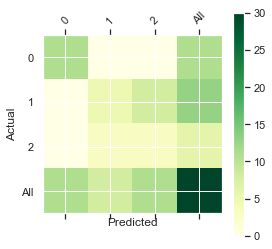

In [30]:
#Analyze result using confusion matrix
print("Result using RBF SVM and C = 1: ")
cal_accuracy(y_test,y_pred_svc_rbf)

the accuracy of prediction on the test set using RBF kernel and C =1 is only 63.33%

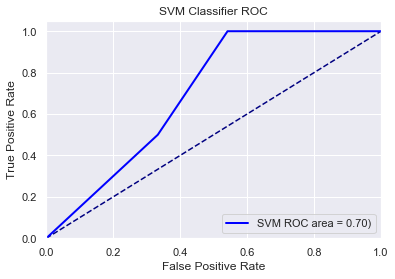

In [31]:
ROC_curve(y_test,y_pred_svc_rbf)

The result of test set with RBF kernel and C = 1 has ROC area = 0.7

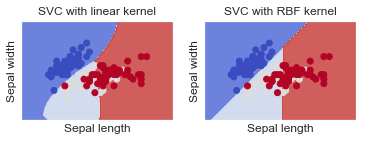

In [32]:
h = .02  # step size in the mesh 
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# title for the plots
titles = ['SVC with linear kernel','SVC with RBF kernel']
for i, clf in enumerate((svc_rbf,svc_linear)):
    plt.subplot(2, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

In [33]:
# K Fold Cross Validation on RBF Kernel
from sklearn.model_selection import KFold
scores = []
best_svc = SVC(kernel='rbf',gamma='auto')
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    best_svc.fit(X_train, y_train)
    scores.append(best_svc.score(X_test, y_test))

In [34]:
#Print out the average score of 10 Fold CV
print(np.mean(scores))

0.7


In [35]:
from sklearn.model_selection import cross_val_score, cross_val_predict
print("List of Prediction:")
cross_val_predict(best_svc, X, y, cv=10)

List of Prediction:


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])